# 分布函数

In [1]:
import pandas as pd
import numpy as np
chance_of_tornado = 0.01
tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)  #产生了1000000个数，数值为0或1.
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1
print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

89 tornadoes back to back in 2739 years


In [9]:
np.random.uniform(0, 1)

0.15809668222354734

In [10]:
#np.random.normal(loc=0.75,scale=1,size=10)  #可运行
np.random.normal(0.75,1,10)   #均值、标准差、方差

array([ 1.08028405,  0.23292124,  0.29880514, -0.58256279,  0.89996014,
        1.75260456,  1.44672194, -0.71272782,  3.0180571 ,  2.10874723])

In [11]:
import pandas as pd
import numpy as np
chi_squared_df2 = np.random.chisquare(2, size=10000)
chi_squared_df5 = np.random.chisquare(5, size=10000)

<IPython.core.display.Javascript object>


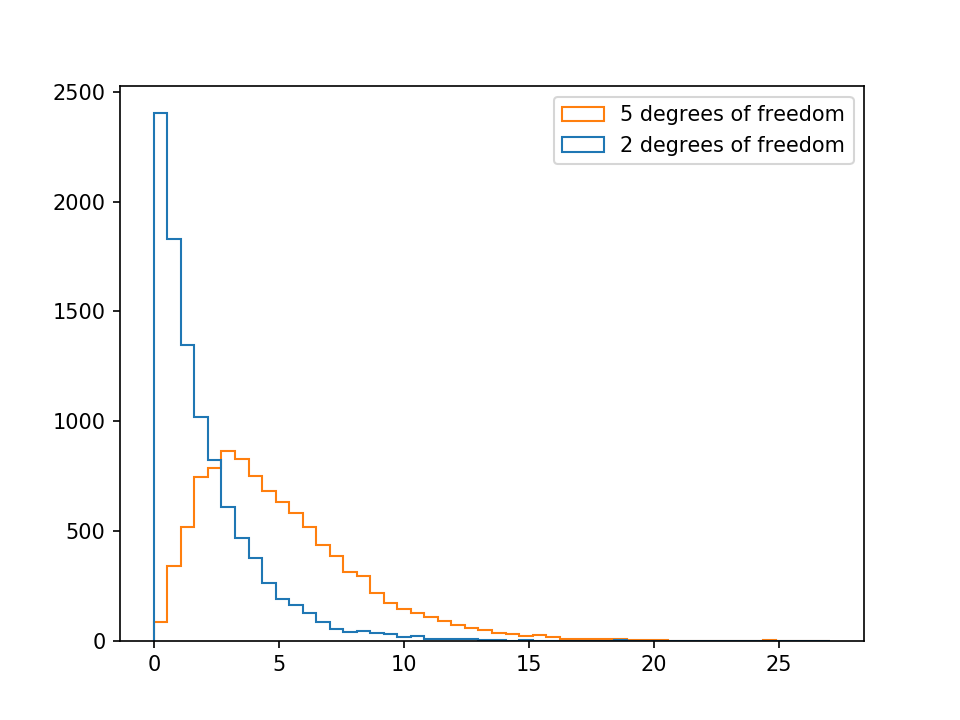

In [16]:
#show matplotlib figures directly in the notebook
%matplotlib notebook    
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')

#df = pd.read_csv('grades.csv')

# 排序的category

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [9]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()    #将Grades变为排序的category的type

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [10]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

# #对变量进行分类

In [18]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])
pd.cut(s, 3)
# You can also add labels for the sizes [Small < Medium < Large].
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])   #自动进行分为3类的操作,每个类别的区间长度是相等的。
#sp=ss.astype('category',categories=['Small','Medium','Large'],ordered=True)   这句是错的，因为small,medium,large只是标签

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

In [15]:
s = pd.Series([0,2,2,4,5,5,7,8,9])
pd.cut(s, 3)

0    (-0.009, 3.0]
1    (-0.009, 3.0]
2    (-0.009, 3.0]
3       (3.0, 6.0]
4       (3.0, 6.0]
5       (3.0, 6.0]
6       (6.0, 9.0]
7       (6.0, 9.0]
8       (6.0, 9.0]
dtype: category
Categories (3, interval[float64]): [(-0.009, 3.0] < (3.0, 6.0] < (6.0, 9.0]]

In [41]:
df=pd.read_csv('cars.csv',index_col = 0, skiprows=1)
df.head()

,Make,model,Unnamed: 3,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,RATING.1,(km),TIME (h)
YEAR,,,,,,,,,,,,,,,,,
2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,n/a,100,7.0
2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,n/a,117,7.0
2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,n/a,122,4.0
2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,n/a,100,7.0
2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,n/a,117,7.0


In [42]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)  #各列的title为不同make的厂家，索引是年也即行标，计算的值是（KW）的平均值

Make,BMW,CHEVROLET,FORD,HYUNDAI,KIA,MITSUBISHI,NISSAN,SMART,TESLA,TESLA,VOLKSWAGEN
YEAR,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN,NaN,NaN
2013,NaN,NaN,107.0,NaN,NaN,49.0,80.0,35.0,257.500000,NaN,NaN
2014,NaN,104.0,107.0,NaN,NaN,49.0,80.0,35.0,268.333333,NaN,NaN
2015,125.0,104.0,107.0,NaN,81.0,49.0,80.0,35.0,321.666667,NaN,NaN
2016,125.0,104.0,107.0,NaN,81.0,49.0,80.0,35.0,409.823529,386.0,NaN
2017,125.0,150.0,107.0,88.0,81.0,49.0,80.0,NaN,383.142857,464.0,100.0
2018,NaN,150.0,107.0,NaN,81.0,NaN,NaN,NaN,423.571429,NaN,NaN


In [1]:
#df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

# T检验

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('grades.csv')

In [5]:
#early = df[df['assignment1_submission'] <= '2015-12-31']
#late = df[df['assignment1_submission'] > '2015-12-31']   #对数据分组

In [6]:
from scipy import stats
#stats.ttest_ind?
#stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

# 作图matplotlib

<IPython.core.display.Javascript object>


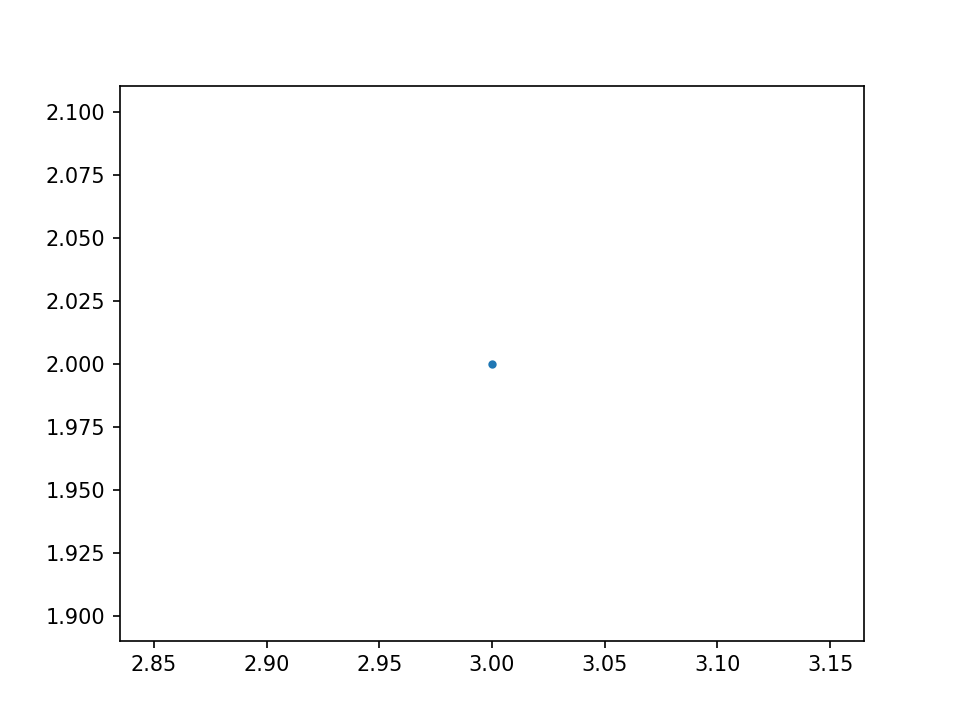

In [18]:
%matplotlib notebook    
#在notebook上是交互的，若是matplotlib inline,则不是交互的图
import matplotlib
import matplotlib.pyplot as plt
#plt.plot?
plt.figure()
plt.plot(3, 2, '.')

<IPython.core.display.Javascript object>


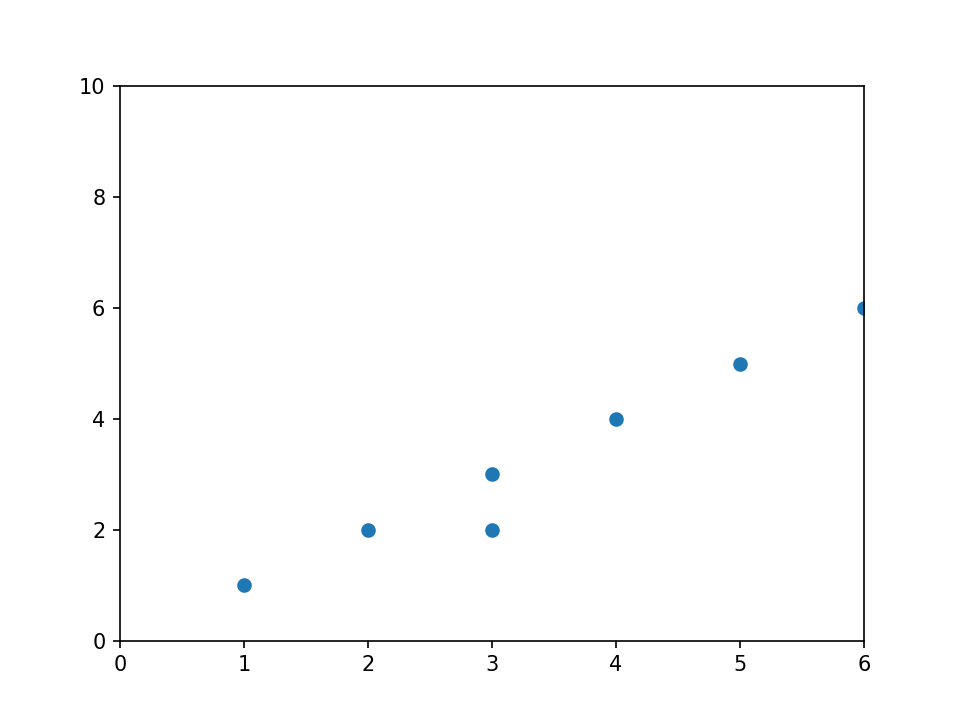

[0, 6, 0, 10]

In [19]:
plt.figure()   #表示画一个新图
plt.plot(3, 2, 'o')
ax = plt.gca()
ax.axis([0,6,0,10])  #改变x,y轴的值

In [20]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

#plt.figure()   #不用这句话是把图作在了上一个图上，并且原图不清除
plt.scatter(x, y)

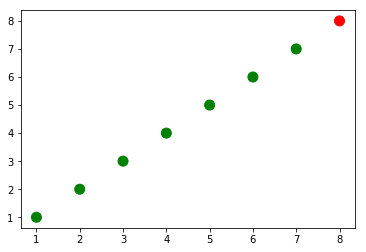

In [13]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8])
y = x
colors = ['green']*(len(x)-1)
colors.append('red')
plt.figure()
plt.scatter(x, y, s=100, c=colors)  # plot the point with size 100 and chosen colors

<IPython.core.display.Javascript object>


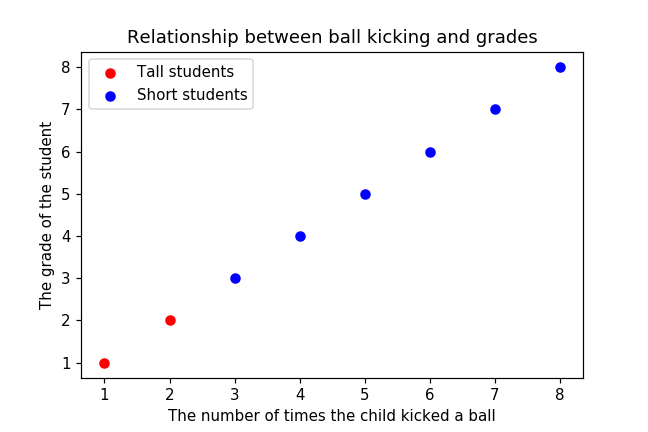

In [18]:
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
plt.figure()
plt.scatter(x[:2],y[:2],c='red',label='Tall students')
plt.scatter(x[2:],y[2:],c='blue',label='Short students')

In [19]:
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

Text(0.5,1,u'Relationship between ball kicking and grades')

In [20]:
plt.legend()   # add a legend (uses the labels from plt.scatter)  就是左上角的红点表示什么，蓝点表示

In [ ]:
plt.legend(loc=4, frameon=False, title='Legend')
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title

# Line Plots

<IPython.core.display.Javascript object>


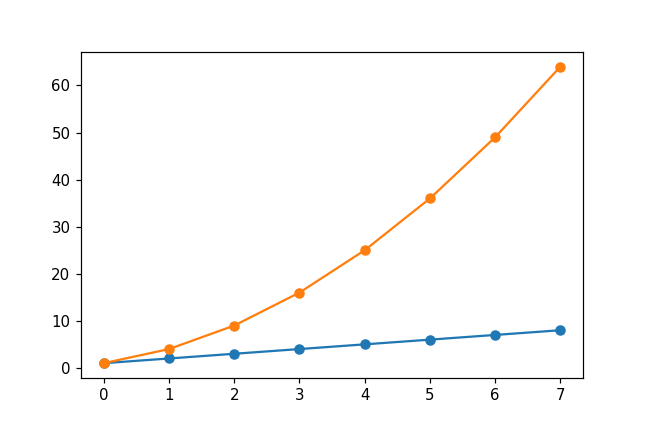

In [31]:
import numpy as np
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2
plt.figure()
plt.plot(linear_data, '-o', exponential_data, '-o')     #-o表示的是电线

In [22]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [28]:
plt.gca?

Object `plt.gca.fill_between` not found.


In [27]:
# fill the area between the linear data and exponential data,只有在交互界面的时候才能执行此操作
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='red',     #表示中间填充的颜色
                       alpha=0.25)

<IPython.core.display.Javascript object>


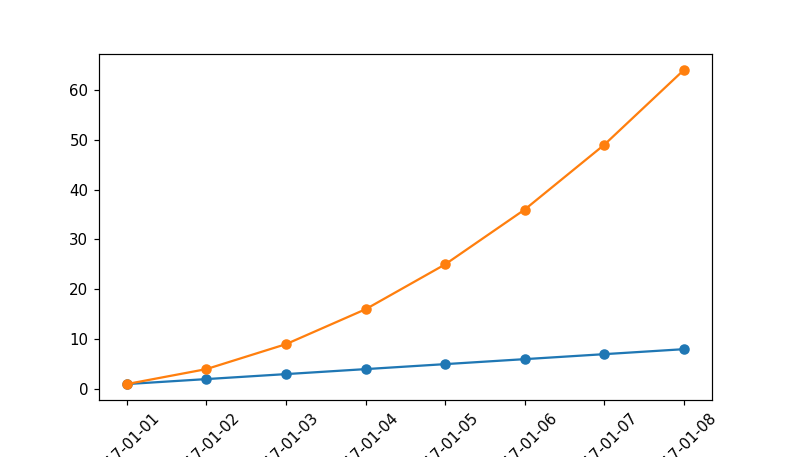

In [32]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
#直接用map会出错，要在外面再加上list   pd.to_datetime加时间转换成标准的2017-01-01时间
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [33]:
x = plt.gca().xaxis
# rotate the tick labels for the x axis   对x轴数值进行旋转
for item in x.get_ticklabels():
    item.set_rotation(45)

In [ ]:
#加title的另外一种方法
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance') 

# bar charts

<IPython.core.display.Javascript object>


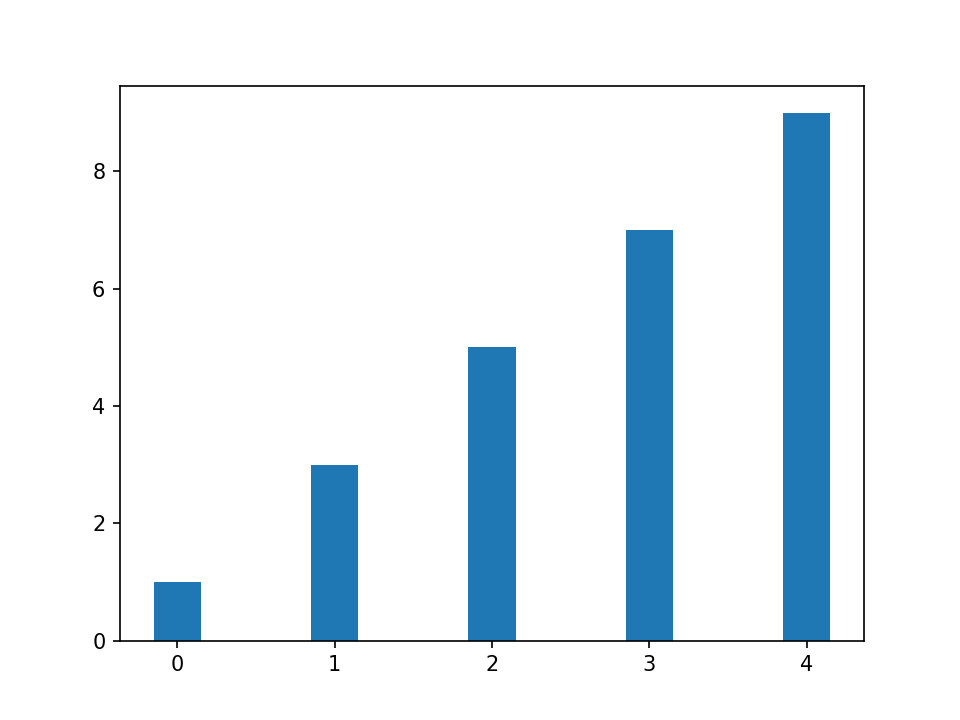

<Container object of 5 artists>

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
linear_data=np.array([1,3,5,7,9])
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [37]:
new_xvals = []
for item in xvals:
    new_xvals.append(item+0.3)
exponential_data=linear_data**2
plt.bar(new_xvals, exponential_data, width = 0.3 ,color='pink')

<Container object of 5 artists>

In [39]:
from random import randint
linear_err = [randint(0,5) for x in range(len(linear_data))] 
#在图上加随机误差
# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 5 artists>

<IPython.core.display.Javascript object>


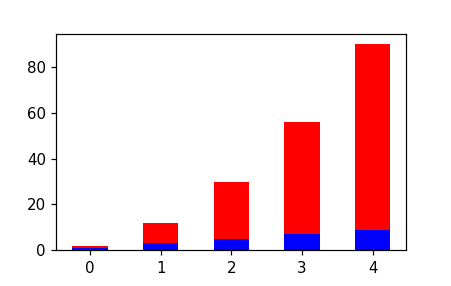

<Container object of 5 artists>

In [40]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.5, color='b')
plt.bar(xvals, exponential_data, width = 0.5, bottom=linear_data, color='r')

# 画子图

In [41]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
#plt.subplot?

<IPython.core.display.Javascript object>


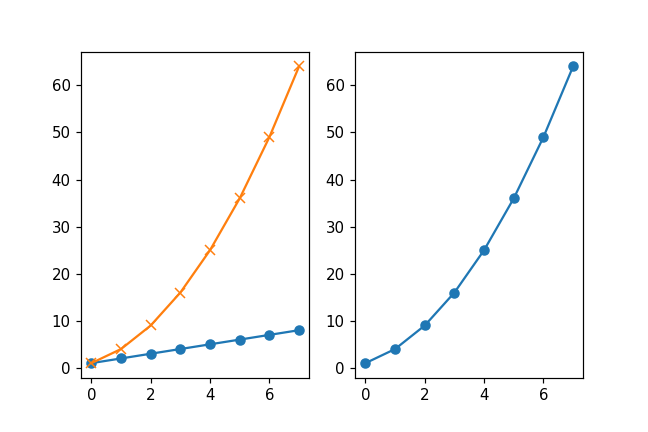

In [42]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)   #子图，1行2列，此为第1列
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

In [43]:
exponential_data = linear_data**2 
# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [44]:
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

C:\Users\lenovo\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis  让子图的y轴相等
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


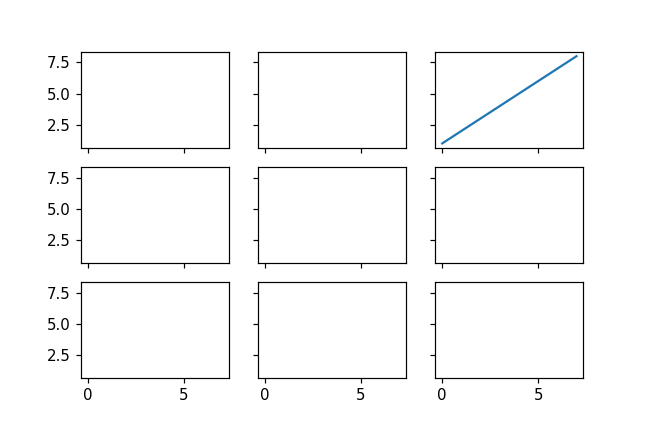

In [45]:
# create a 3x3 grid of subplots  作3*3的矩阵子图
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)  #标识了3*3子图的位置
# plot the linear_data on the 5th subplot axes 
ax3.plot(linear_data, '-')

In [46]:
# set inside tick labels to visible  运行无效
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [39]:
import numpy as np
#range(5)  #输出结果为list
s=np.arange(0,4)*0.01 #输出结果是array
#range(5)*0.01    #输出错误，说明range不能*0.01
s.shape   #在python2 s.shape输出结果有误

(4L,)

# 直方图

<IPython.core.display.Javascript object>


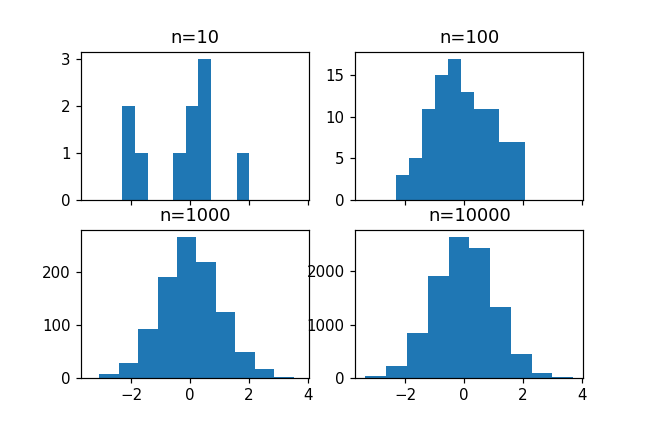

In [67]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)  #sample输出结果为array，产生服从正态分布的随机数
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

# 画三小图

<IPython.core.display.Javascript object>


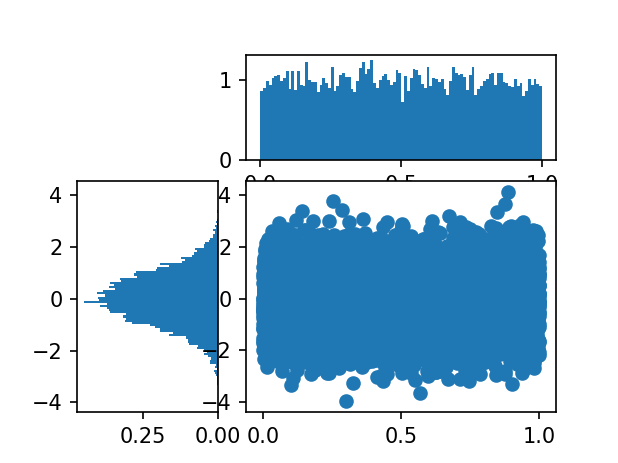

In [8]:
# use gridspec to partition the figure into subplots
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [6]:
#plt.figure()
#gspec = gridspec.GridSpec(5, 5)   #相当于分配了一个5*5的矩阵，行列的0都从左上角算起
#top_histogram = plt.subplot(gspec[0:2, 2:])
#side_histogram = plt.subplot(gspec[2:, 0:2])
#lower_right = plt.subplot(gspec[2:, 2:])

In [9]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [10]:
# clear the histograms and plot normed histograms  normed是什么意思
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# 盒子和边界线图  Box and Whisker Plots

In [12]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)
#gamma_sample=np.random.gamma(2,3,size=10000)  #alpha=2,beta=3

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [ ]:
df.describe()    #描述统计，十分重要

<IPython.core.display.Javascript object>


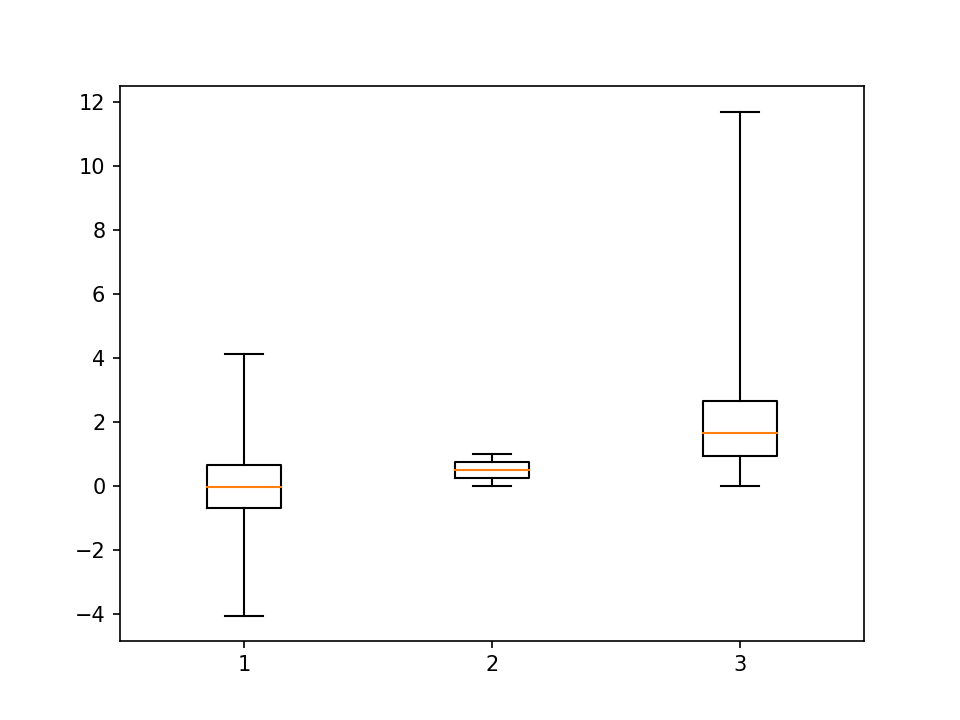

In [18]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [19]:
# clear the current figure，清除当前图
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


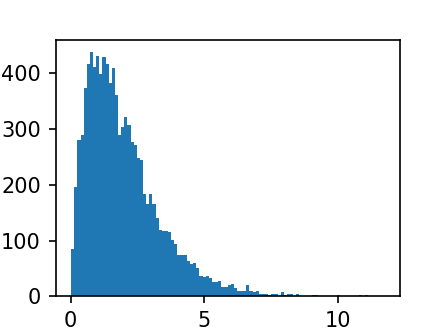

In [15]:
plt.figure()    #建立新图
_ = plt.hist(df['gamma'], bins=100)

In [30]:
gamma_figure1=np.random.gamma(2,1,size=10000)
gamma_figure2=np.random.gamma(2,2,size=10000)
gamma_figure3=np.random.gamma(2,3,size=10000)
gamma_figure4=np.random.gamma(3,1,size=10000)
gamma_figure5=np.random.gamma(3,2,size=10000)
gamma_figure6=np.random.gamma(3,3,size=10000)
gamma_figure7=np.random.gamma(4,1,size=10000)
gamma_figure8=np.random.gamma(4,2,size=10000)
gamma_figure9=np.random.gamma(4,3,size=10000)

<IPython.core.display.Javascript object>


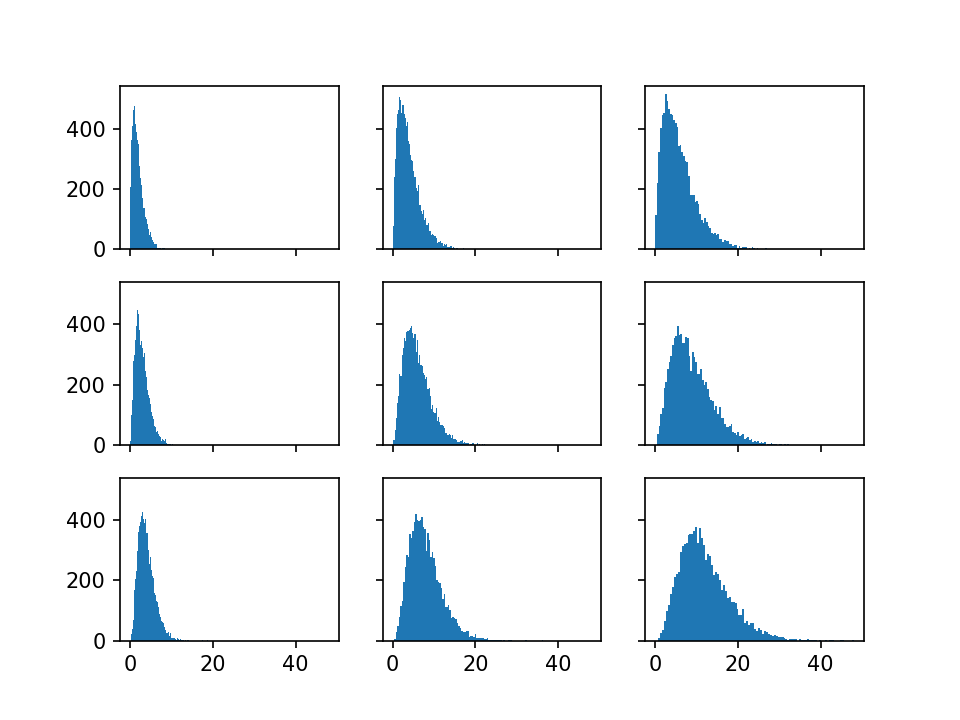

(array([  10.,   26.,   36.,   65.,   98.,  119.,  154.,  177.,  210.,
         222.,  227.,  293.,  313.,  321.,  324.,  351.,  352.,  355.,
         364.,  378.,  324.,  372.,  341.,  316.,  266.,  286.,  282.,
         250.,  218.,  227.,  220.,  201.,  169.,  186.,  166.,  143.,
         146.,  129.,  127.,  126.,  105.,   85.,   85.,  106.,   59.,
          64.,   53.,   59.,   58.,   40.,   31.,   44.,   37.,   21.,
          32.,   28.,   21.,   18.,   16.,   18.,   16.,   14.,   13.,
          12.,    8.,    5.,    4.,    6.,    6.,    6.,    5.,    0.,
           7.,    3.,    1.,    3.,    5.,    2.,    1.,    3.,    1.,
           0.,    1.,    0.,    0.,    1.,    0.,    1.,    1.,    2.,
           0.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([  0.73567269,   1.20894213,   1.68221157,   2.15548101,
          2.62875045,   3.10201989,   3.57528933,   4.04855877,
          4.52182821,   4.99509765,   5.4683671 ,   5.94163654,
          6.414905

In [32]:
#plt.figure()
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
ax1.hist(gamma_figure1,bins=100)
ax2.hist(gamma_figure2,bins=100)
ax3.hist(gamma_figure3,bins=100)
ax4.hist(gamma_figure4,bins=100)
ax5.hist(gamma_figure5,bins=100)
ax6.hist(gamma_figure6,bins=100)
ax7.hist(gamma_figure7,bins=100)
ax8.hist(gamma_figure8,bins=100)
ax9.hist(gamma_figure9,bins=100)

# 热图 Heatmaps

In [ ]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=1000)
X = np.random.random(size=1000)
_ = plt.hist2d(X, Y, bins=25)   #bins越大，点越小

<IPython.core.display.Javascript object>


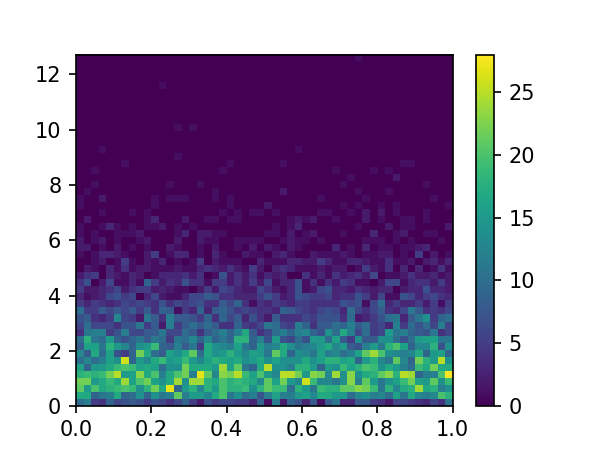

In [21]:
plt.figure()
Y = np.random.gamma(2, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=50)   #bins越大，点越小

In [22]:
# add a colorbar legend
plt.colorbar()

# 动态图

In [40]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)   #产生标准正态分布

In [41]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


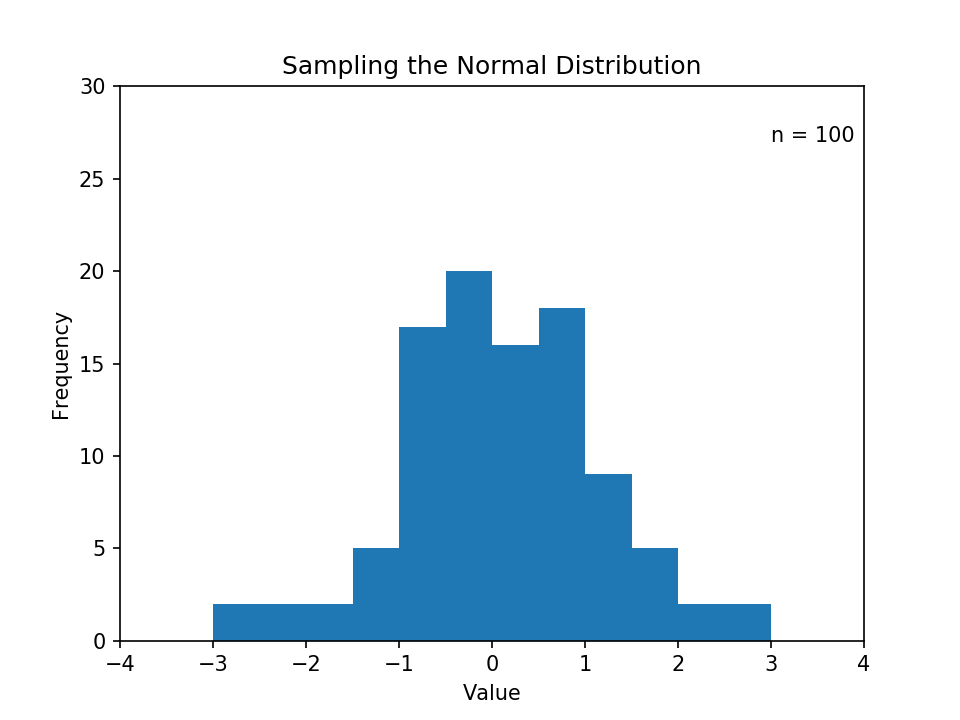

In [42]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# dataframe.plot

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
np.random.seed(123)
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),   #cumsum表示累加
                   'B': np.random.randn(365).cumsum(0)+20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                 index=pd.date_range('1/1/2017', periods=365)
                 )
df.head()
#s.cumsum(0)  #对二维数组而言，cumsum（0）表示每列累加的结果,cumsum(1)表示每行累加的结果
#对三维数组，cumsum(0)表示每高累加的结果，cumsum(1) 每列  cumsum(2)每行

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


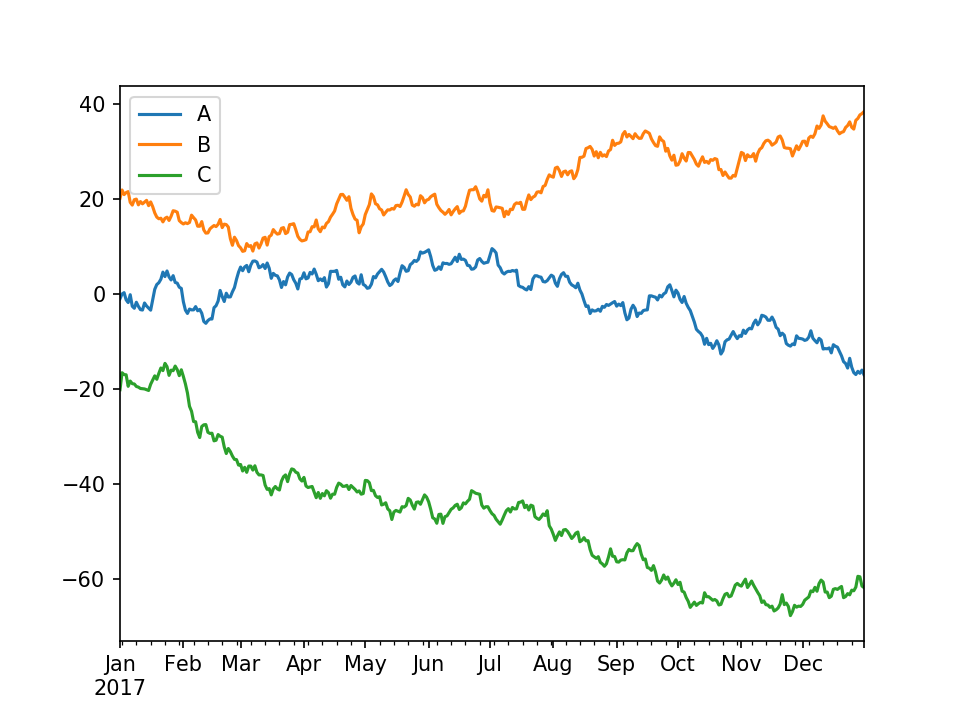

In [57]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

<IPython.core.display.Javascript object>


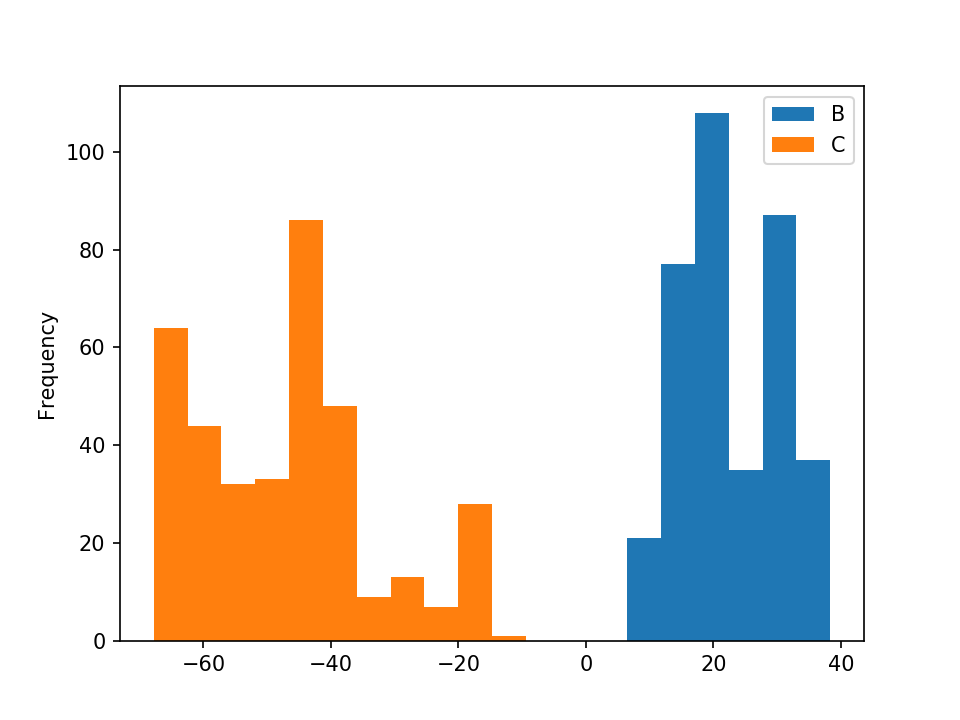

In [74]:
#df.plot(kind = 'hist',bins=50);  #表示ABC的直方图
#df.plot('A','B', kind = 'scatter');
df.plot('A',kind = 'hist',bins=20);  #表示B C的直方图

#You can also choose the plot kind by using the DataFrame.plot.kind methods instead of providing the kind keyword argument.
#kind :
#'line' : line plot (default)
#'bar' : vertical bar plot
#'barh' : horizontal bar plot
#'hist' : histogram
#'box' : boxplot
#'kde' : Kernel Density Estimation plot
#'density' : same as 'kde'
#'area' : area plot
#'pie' : pie plot
#'scatter' : scatter plot
#'hexbin' : hexbin plot

In [48]:
df['A'].head()

2017-01-01   -1.085631
2017-01-02   -0.088285
2017-01-03    0.194693
2017-01-04   -1.311601
2017-01-05   -1.890202
Freq: D, Name: A, dtype: float64

In [ ]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


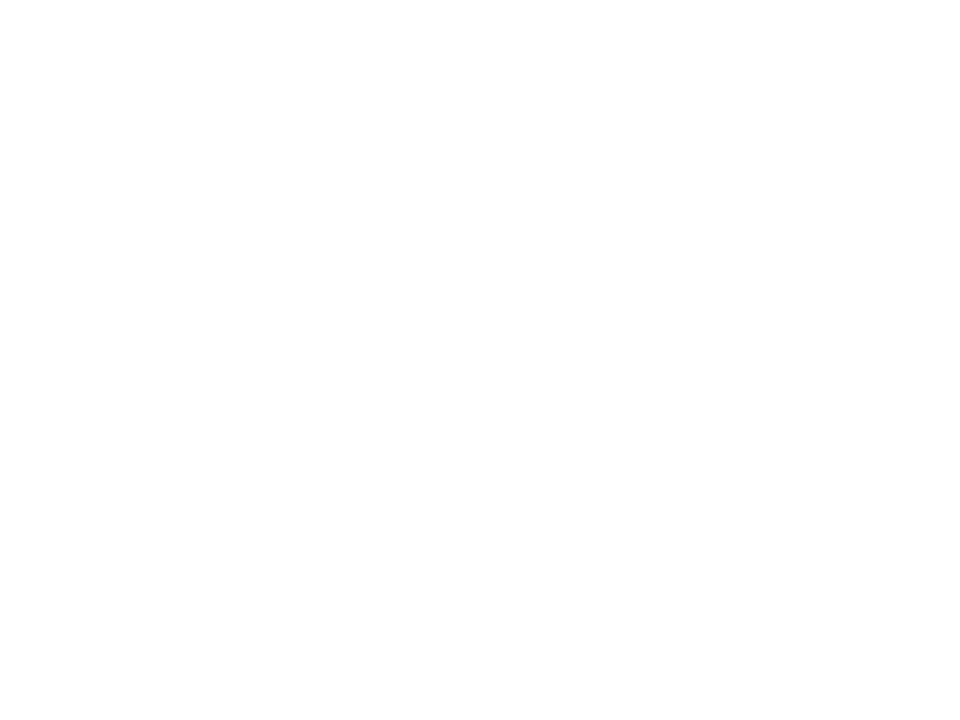

<IPython.core.display.Javascript object>


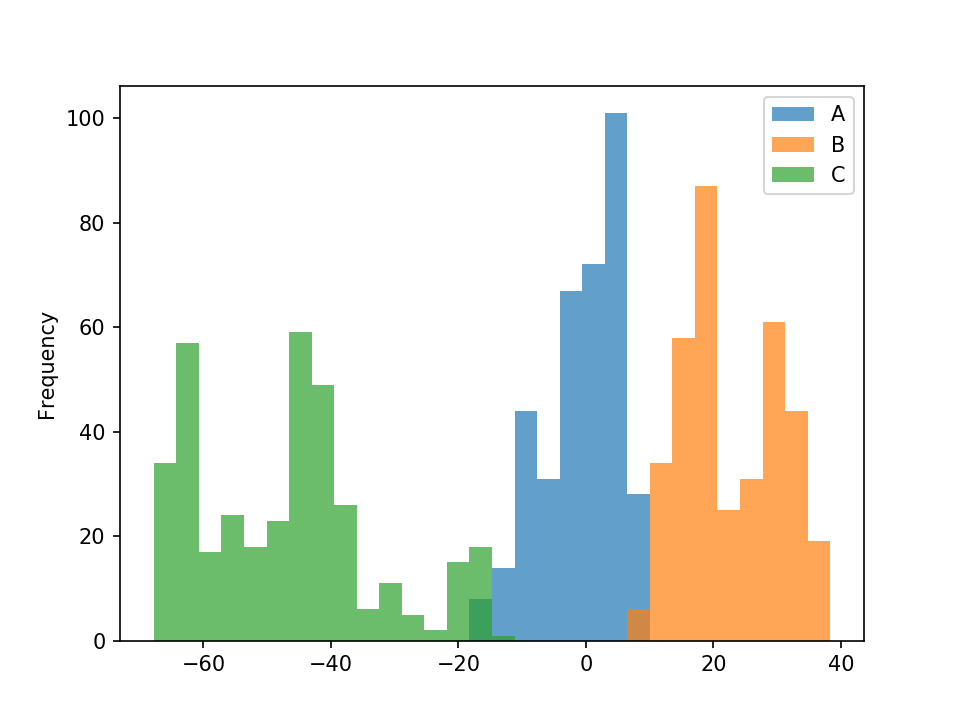

In [75]:
#import seaborn as sns
plt.figure()
#df.plot.hist(alpha=0.7,bins=np.arange(-50,100,10));   #alpha表示填充系数   最优bins=10，此时宽度为10
df.plot.hist(alpha=0.7,bins=30)              #每个直方图宽度好像变成了10/3
#plt.hist([df['A'],df['B']],alpha=0.7,normed=True)    #以下可行，但图难看，注意要加上normed=True 
#normed：是否对y轴数据进行标准化(如果为True,则是在本区间的点在所有的点中所占的概率) 
#v3 = np.concatenate((df['A'],df['B']))
#sns.kdeplot(v3);

<IPython.core.display.Javascript object>


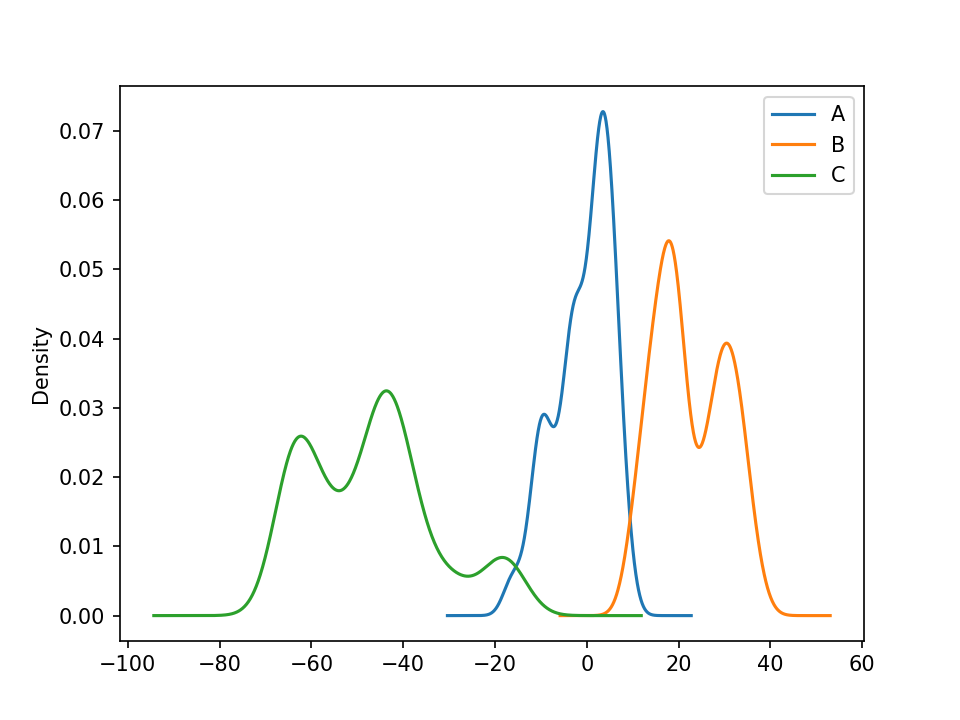

In [40]:
df.plot.kde();   #密度曲线

# seaborn

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


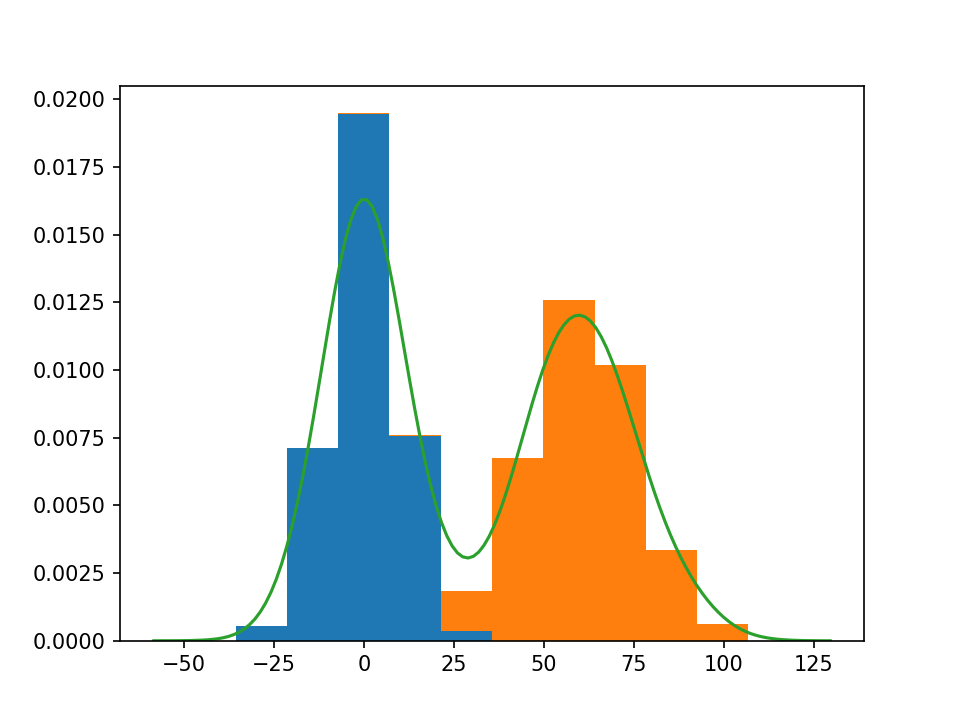

In [76]:
np.random.seed(1234)
#v1 = pd.Series(np.random.normal(0,10,1000), name='v1')   #此处数据类型是series，用dataframe也行
#v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')
# plot a kernel density estimation over a stacked barchart
df=pd.DataFrame({'A':np.random.normal(0,10,1000),
                 'B':np.random.normal(60,15,1000)})
plt.figure()
#plt.hist([v1, v2], histtype='barstacked', normed=True);
#v3=np.concatenate((v1,v2))
plt.hist([df['A'],df['B']],histtype='barstacked', normed=True);
v3 = np.concatenate((df['A'],df['B']))
sns.kdeplot(v3);

In [ ]:
iris = pd.read_csv('iris.csv')
iris.head()

In [ ]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);  #以name分组，对角线上画kde,其他的画散点图